# Aufgabe 13.1

Es sei $\{X_1, X_2, ... \}$ ein diskreter stochastischer Prozess. Zeigen Sie, dass

$$
\gamma(i, j)=\mathrm{E}\left(X_{i} X_{j}\right)-\mu(i) \mu(j)
$$

Definition:

$$ \gamma(i,j) = E\left[ \big( X_i - \mu(i) \big) \cdot \big(X_j - \mu(j) \big) \right] $$

Daraus folgt:

$$\gamma(i,j) = E[X_i X_j - X_i \mu(j) - X_j \mu(i) + \mu(i) \mu(j)] $$

$E[X_i] = \mu_i$ und $E[X_j] = \mu_j$. Daraus folgt:

$$ \gamma(i,j) = E(X_iX_j) - \mu(i\mu(j)$$

# Aufgabe 13.2

In dieser Aufgabe werden wir die empirische Autokorrelationsfunktion diverser Zeitreihen
berechnen und graphisch darstellen. Insbesondere interessiert uns die Autokorrelationsfunktion
verrauschter Signale.

**a) Berechnen Sie die Autokorrelationsfunktion des Börsenkurses von Tesla und
stellen Sie diese graphisch dar.**

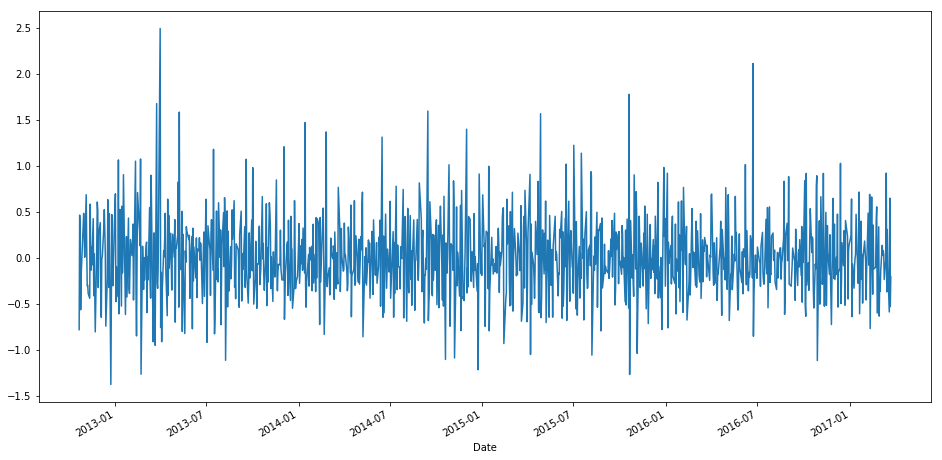

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib

matplotlib.rcParams['figure.figsize'] = [16, 8]

Tesla = pd.read_csv("./data/Tesla.csv", sep="\t",header=0)
Tesla["Date"] = pd.DatetimeIndex(Tesla["Date"])
Tesla.set_index("Date", inplace=True)
Tesla["log_volume"] = np.log(Tesla["Volume"])
Tesla["log_return"] = Tesla["log_volume"] - Tesla["log_volume"].shift(1)
Tesla["log_return"].plot()
plt.show()

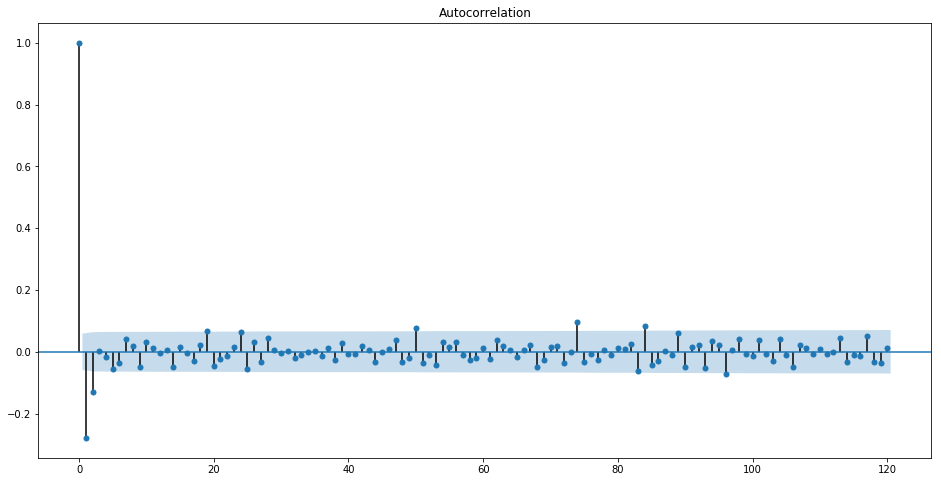

In [8]:
plot_acf(pd.DataFrame(Tesla["log_return"]).dropna(), lags=120)
plt.show()

**b) Berechnen Sie die Autokorrelationsfunktion für ein verrauschtes linear steigendes
Signal.**

(-2, 2)

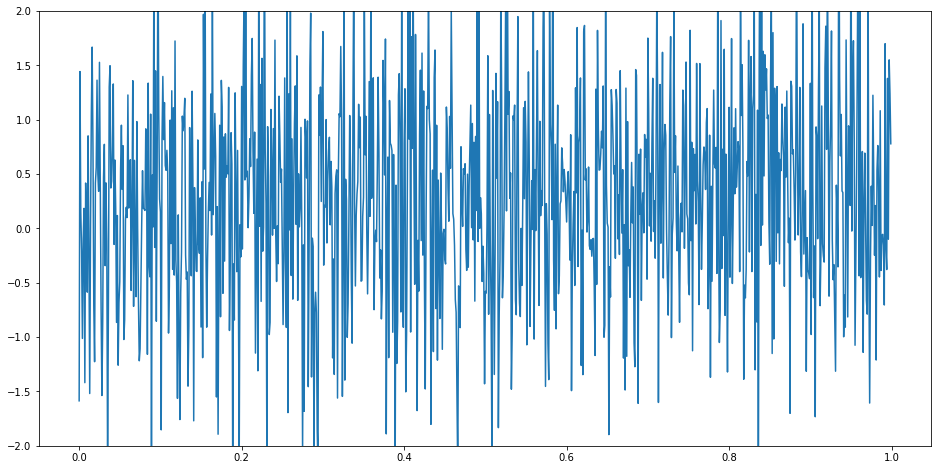

In [10]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
signal = 0.5*t
plt.plot(t, signal + noise)
plt.ylim(-2, 2)

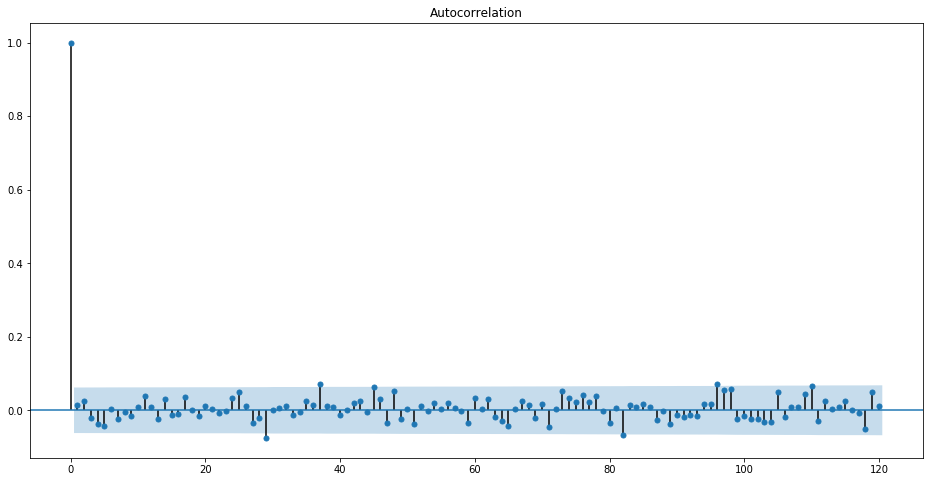

In [11]:
plot_acf(DataFrame(signal + noise).dropna(), lags=120)
plt.show()

**Berechnen Sie die Autokorrelationsfunktion für ein verrauschtes Cosinus-Signal.**

(-2, 2)

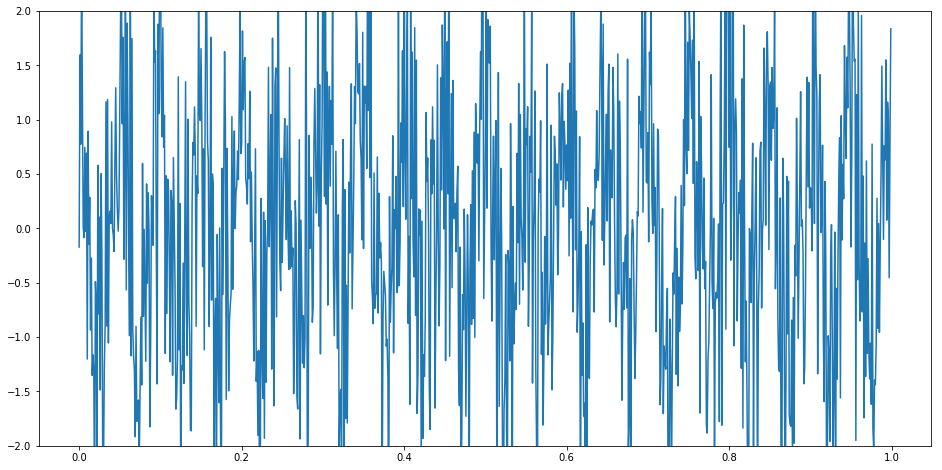

In [12]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
signal = np.cos(2 * np.pi * 20 * t)
plt.plot(t, signal + noise)
plt.ylim(-2, 2)

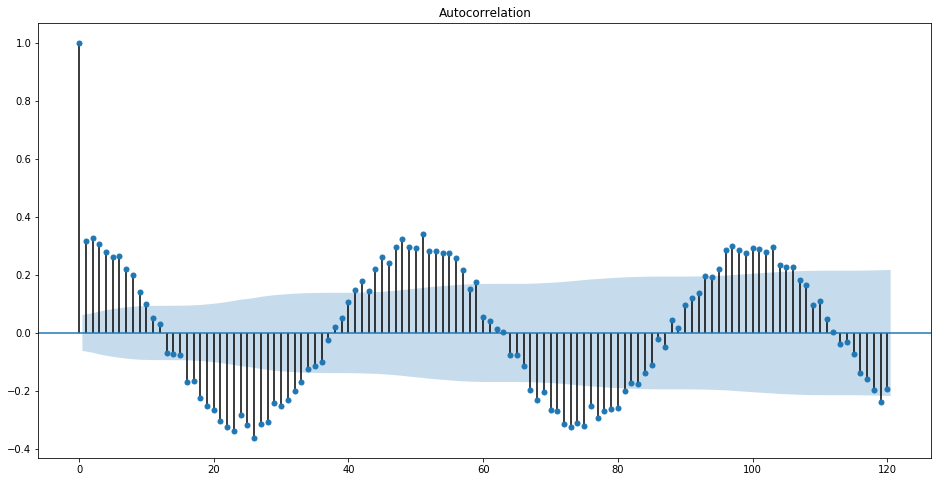

In [13]:
plot_acf(DataFrame(signal + noise).dropna(), lags=120)
plt.show()

**d) Berechnen Sie ein verrauschtes Rechtecksignal.**

(-2, 2)

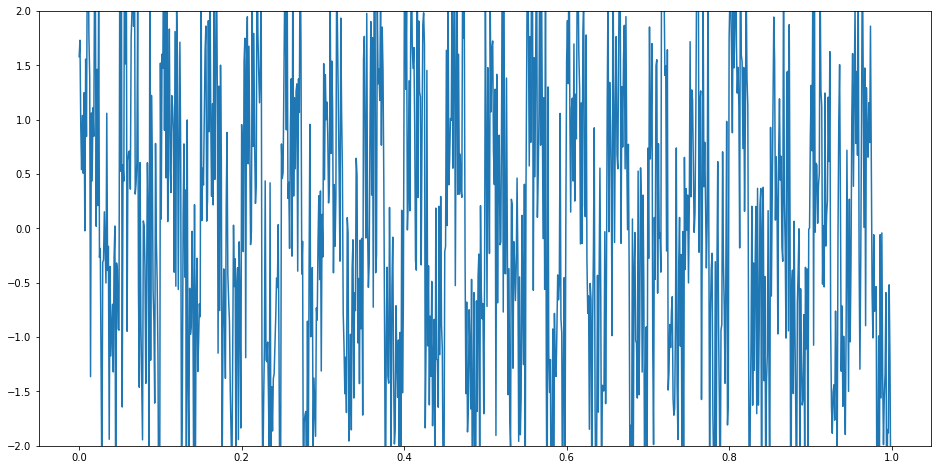

In [14]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
plt.plot(t, signal.square(2 * np.pi * 20 * t) + noise)
plt.ylim(-2, 2)

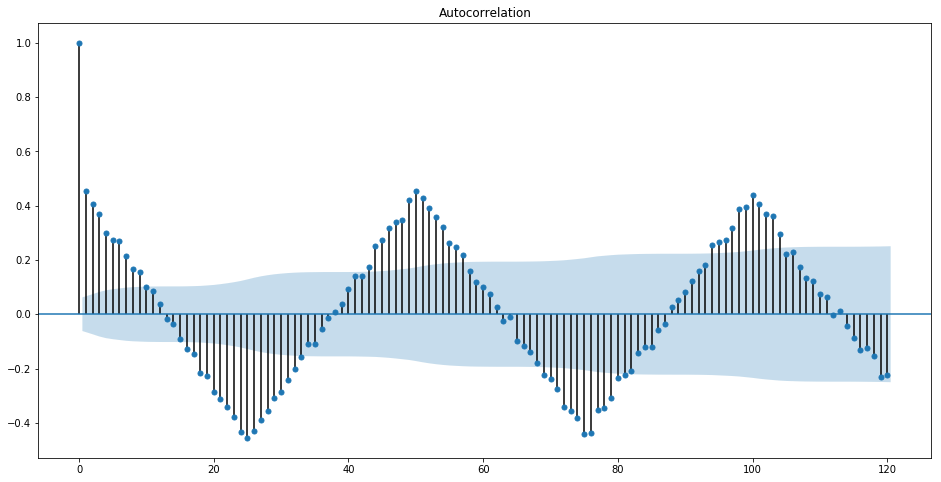

In [15]:
plot_acf(DataFrame(signal.square(2 * np.pi * 20 * t) + noise).dropna(), lags=120)
plt.show()

**e) Berechnen Sie ein verrauschtes Sägezahnsignal.**

(-2, 2)

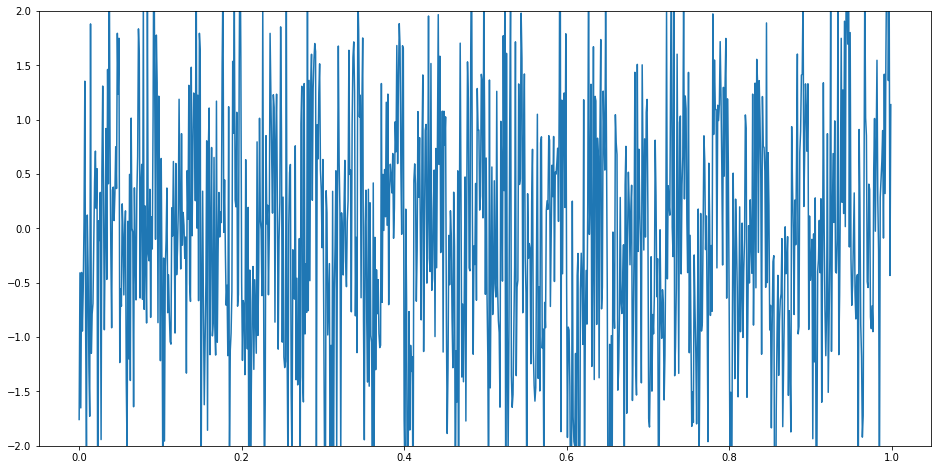

In [16]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
signal = signal.sawtooth(2 * np.pi * 20 * t)
plt.plot(t, signal + noise)
plt.ylim(-2, 2)

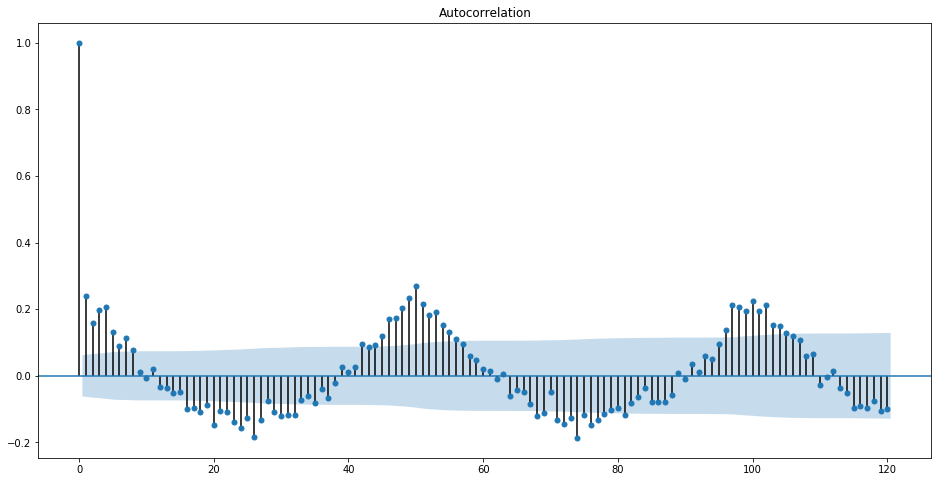

In [17]:
plot_acf(DataFrame(signal + noise).dropna(), lags=120)
plt.show()

# Aufgabe 13.3

**a) Ein stochastischer Prozess sei definiert durch**

$$X_i = T + (1 - i)$$

**wobei T eine über dem Intervall $[0, 1]$ uniform verteilte Zufallsvariable ist. Bestimmen
Sie die Autokorrelationsfunktion $\gamma(i, j) = E[(Xi − μ(i))(Xj − μ(j))]$.
Handelt es sich bei $X_i$ um einen stationären stochastischen Prozess?**

$E[X_i] = \frac{3}{2}-i$

$$
\begin{aligned} \gamma(i, j) &=\mathrm{E}\left[\left(T+(1-i)-\frac{3}{2}+i\right) \cdot\left((T+(1-j))-\frac{3}{2}+j\right)\right] \\ &=\mathrm{E}\left[\left(T-\frac{1}{2}\right) \cdot\left(T-\frac{1}{2}\right)\right] \\ &=\mathrm{E}\left[T^{2}\right]+\mathrm{E}[T]+\frac{1}{4} \\ &=\frac{1}{3}+\frac{1}{2}+\frac{1}{4} \\ &=\frac{13}{12} \end{aligned}
$$

Der Scharmittelwert ist abhängig von der Zeit ($i$) $\rightarrow$ nicht-stationär.

**b) Wir betrachten den zeit-diskreten Zufallsprozess**

$$ \overline{X}_n = A^n$$

**wobei A eine auf dem Intervall $[0, 1]$ gleichmässig verteilte Zufallsvariable ist
und $n ∈ \mathbb{N}^+_0$ . Handelt es sich bei $X_n$ um einen stationären Zufallsprozess?
Berechnen Sie dazu $μ(n) = E[X_n]$ und $\gamma(n,m) = E[(X_n − μ(n))(Xm − μ(m))]$.**

Scharmittelwert:

$$
\mu(n)=\mathrm{E}\left[X_{n}\right]=\mathrm{E}\left[A^{n}\right]=\int_{0}^{1} a^{n} \mathrm{d} a=\frac{1}{n+1}
$$

Autokorrelationsfunktion:

$$
\begin{aligned} \gamma(n, m) &=\mathrm{E}\left[\left(X_{n}-\frac{1}{n+1}\right)\left(X_{m}-\frac{1}{m+1}\right)\right] \\ &=\mathrm{E}\left[A^{n+m}\right]-\frac{1}{n+1} \mathrm{E}\left[A^{m}\right]-\frac{1}{m+1} \mathrm{E}\left[A^{n}\right]+\frac{1}{(n+1) \cdot(m+1)} \\ &=\int_{0}^{1} a^{n+m} \mathrm{d} a-\frac{1}{(n+1) \cdot(m+1)} \\ &=\frac{1}{n+m+1}-\frac{1}{(n+1) \cdot(m+1)} \end{aligned}
$$

Da sowohl der Scharmittelwert wie auch die Autokorrelationsfunktion von den Zeitvariablen ($n,m$) abhängen $\rightarrow$ nicht-stationär.

# Aufgabe 13.4

Wir betrachten den folgenden moving average Prozess

$$X_i = W_{i-1} + 2W_{i} + W_{i+1}$$

wobei $W_i$ unabhängige Zufallsvariablen mit Erwartungswert 0 und Varianz $\sigma^2$ seien.

**a) Berechnen Sie die Mittelwertsfolge dieses Prozesses.**

$\mu(i) = 0$

**b) Berechnen Sie die Autokovarianz und Autkorrelationsfolge dieses Prozesses.**

Autokovarianz für den lag = 0, d.h. $i=j$:

$$E(X_iX_j) = 0, falls\ i \neq j$$

Daraus folgt:

$$
\begin{aligned} \gamma(i, i) &=\mathrm{E}\left(\left(W_{i-1}+2 W_{i}+W_{i+1}\right)\left(W_{i-1}+2 W_{i}+W_{i+1}\right)\right) \\
&=\mathrm{E}\left(W_{i-1}^{2}\right)+4 \mathrm{E}\left(W_{i}^{2}\right)+\mathrm{E}\left(W_{i+1}^{2}\right)=\sigma^{2}+4 \sigma^{2}+\sigma^{2}=6 \sigma^{2} \end{aligned}
$$

Analog finden wir für $j = i + 1$:

$$
\begin{aligned} \gamma(i, i+1) &=\mathrm{E}\left(\left(W_{i-1}+2 W_{i}+W_{i+1}\right)\left(W_{i}+2 W_{i+1}+W_{i+2}\right)\right) \\ &=2 \mathrm{E}\left(W_{i}^{2}\right)+2 \mathrm{E}\left(W_{i+1}^{2}\right)=2 \sigma^{2}+2 \sigma^{2}=4 \sigma^{2} \end{aligned}
$$

Schliesslich erhalten wir für $j = i + 2$:

$$
\begin{aligned} \gamma(i, i+2) &=\mathrm{E}\left(\left(W_{i-1}+2 W_{i}+W_{i+1}\right)\left(W_{i+1}+2 W_{i+2}+W_{i+3}\right)\right) \\ &=\mathrm{E}\left(W_{i+1}^{2}\right)=\sigma^{2} \end{aligned}
$$

Zusammengefasst:

$$
\gamma(i, j)=\left\{\begin{array}{ll}{6 \sigma^{2}} & {\text { falls } j=i} \\ {4 \sigma^{2}} & {\text { falls } j=i+1} \\ {\sigma^{2}} & {\text { falls } j=i+2} \\ {0} & {\text { ansonsten. }}\end{array}\right.
$$

Die Autokorrelation erhält man durch $\rho(i, j) = \gamma(i, j)/\gamma(i, i)$, da die Autokovarianz bloss vom Lag der Zeiten $h = i − j$ abhängt. Daraus ergibt sich

$$
\rho(i, j)=\left\{\begin{array}{ll}{1} & {\text { falls } j=i} \\ {\frac{2}{3}} & {\text { falls } j=i+1} \\ {\frac{1}{6}} & {\text { falls } j=i+2} \\ {0} & {\text { ansonsten }}\end{array}\right.
$$

**c) Zeichnen Sie die Autokorrelationsfunktion $\rho(i, j)$ als eine Funktion vom lag $h =
i − j$ auf.**

$$
\rho(h)=\left\{\begin{array}{ll}{1} & {\text { falls } h=0} \\ {\frac{2}{3}} & {\text { falls } h=1} \\ {\frac{1}{6}} & {\text { falls } h=2} \\ {0} & {\text { ansonsten. }}\end{array}\right.
$$

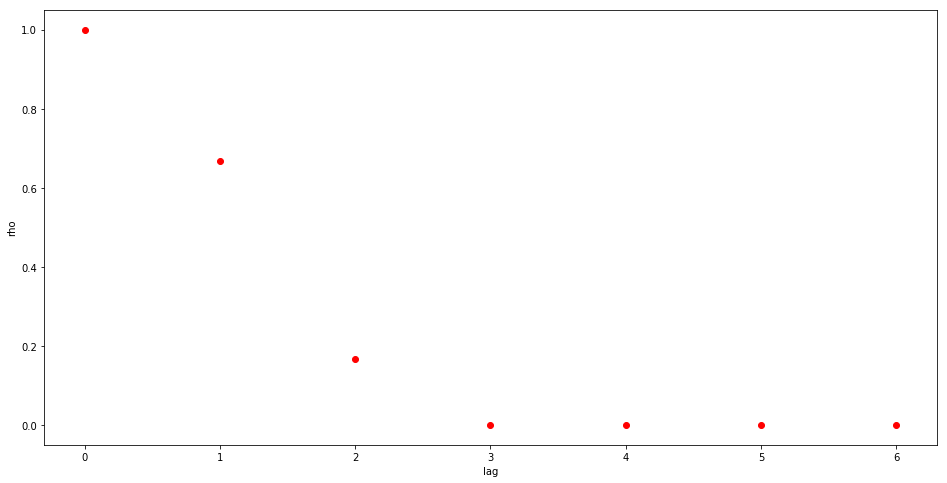

In [22]:
import numpy as np
import matplotlib.pyplot as plt
h = [(0, 1, 2, 3, 4, 5, 6)]
rho = [(1, 2/3, 1/6, 0, 0, 0, 0)]
plt.plot(h, rho, 'ro')
plt.xlabel("lag")
plt.ylabel("rho")
plt.show()